In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [2]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц

In [3]:

num_samples = int(duration * sample_rate)

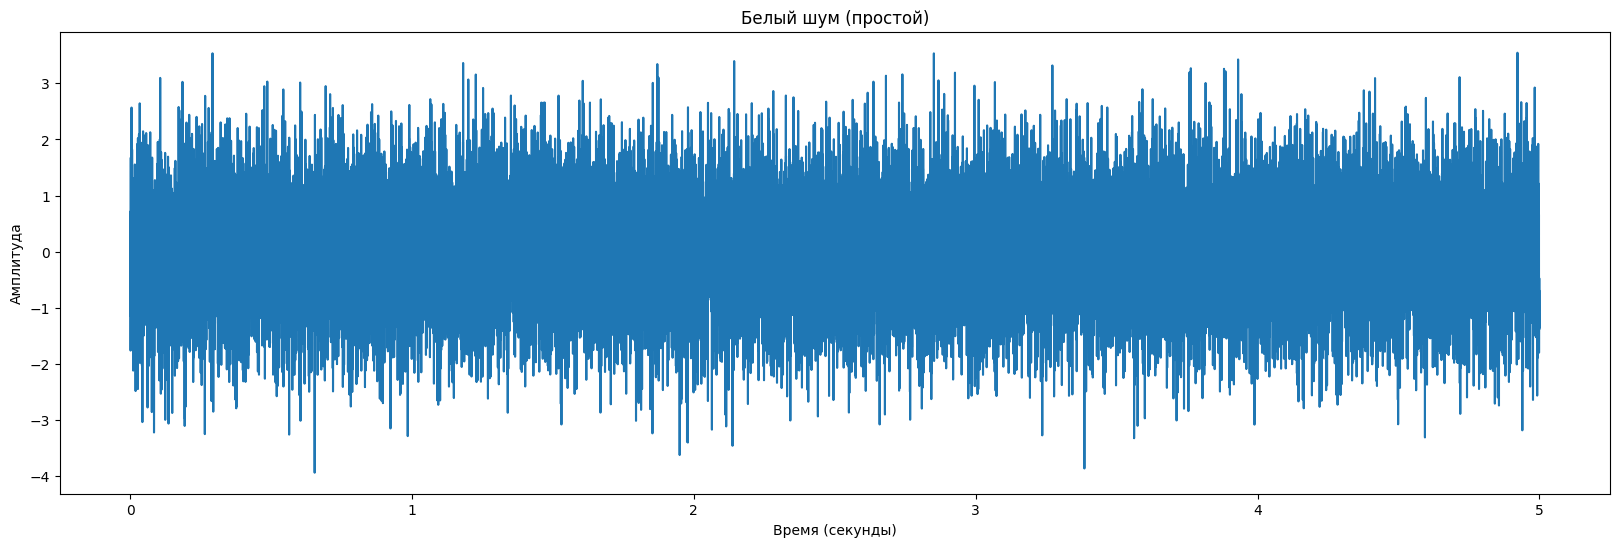

In [4]:

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)

time_axis = np.linspace(0, duration, len(white_noise_g))

plt.figure(figsize=(20, 6))

plt.plot(time_axis, white_noise_g)

plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

In [ ]:
sd.play(white_noise_g, sample_rate)
sd.wait()

In [ ]:
# Генераця розового шума путем применения преобразования Фурье к белому шуму

fft = np.fft.rfft(white_noise_g)
fft_normalized = np.real(fft) / np.sqrt(np.arange(1, len(fft) + 1))
pink_noise = np.fft.irfft(fft_normalized, len(white_noise_g))

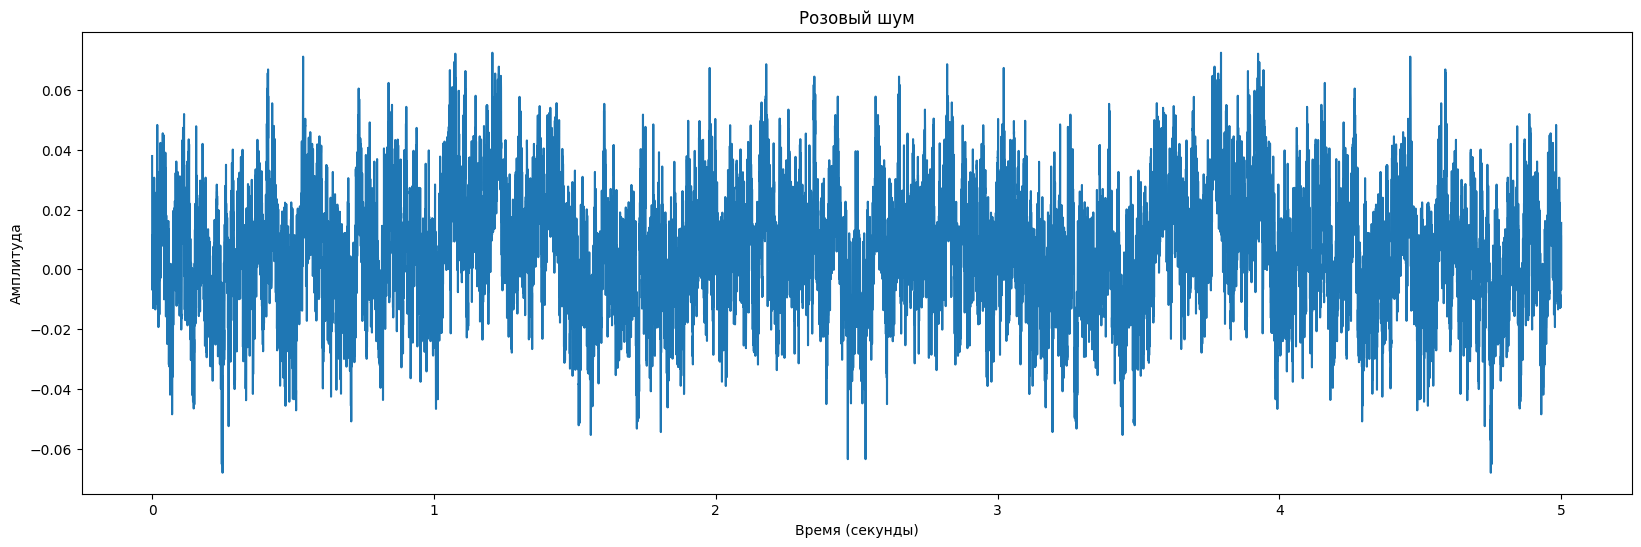

In [7]:
# отрисовываем, что получилось
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duration).
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise))

plt.figure(figsize=(20, 6))

# определяем, что будем отрисовывать. По x - time_axis, по y - pink_noise
plt.plot(time_axis, pink_noise)

plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

In [8]:
sd.play(pink_noise, sample_rate)
sd.wait()

In [9]:
# Генерация черного шума
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

num_samples = int(duration * freq1)


# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось



black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]


ModuleNotFoundError: No module named 'scipy'

In [12]:
# Визуализация черного шума
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

NameError: name 'black_noise' is not defined

In [13]:
sd.play(black_noise, freq1)
sd.wait()

NameError: name 'black_noise' is not defined

In [14]:
duration = 10  # Продолжительность в секундах
sample_rate = 3000  # Частота дискретизации в Гц

num_points = duration * sample_rate  # количество точек

time_points = np.linspace(0, duration, num_points)  # Создаем равномерные временные точки от 0 до 5 секунд

white_noise_base = np.random.normal(0, 2, size=num_points)  # Генерим белый шум

values = 15 * np.sin(3*np.sin(4 * time_points * np.pi)) # вычисляем амплитуды сигнала по синусоидальному закону

values_noise = values + white_noise_base # зашумляем сигнал

C:\Users\DreaM\AppData\Local\Temp\ipykernel_14308\4188909529.py:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


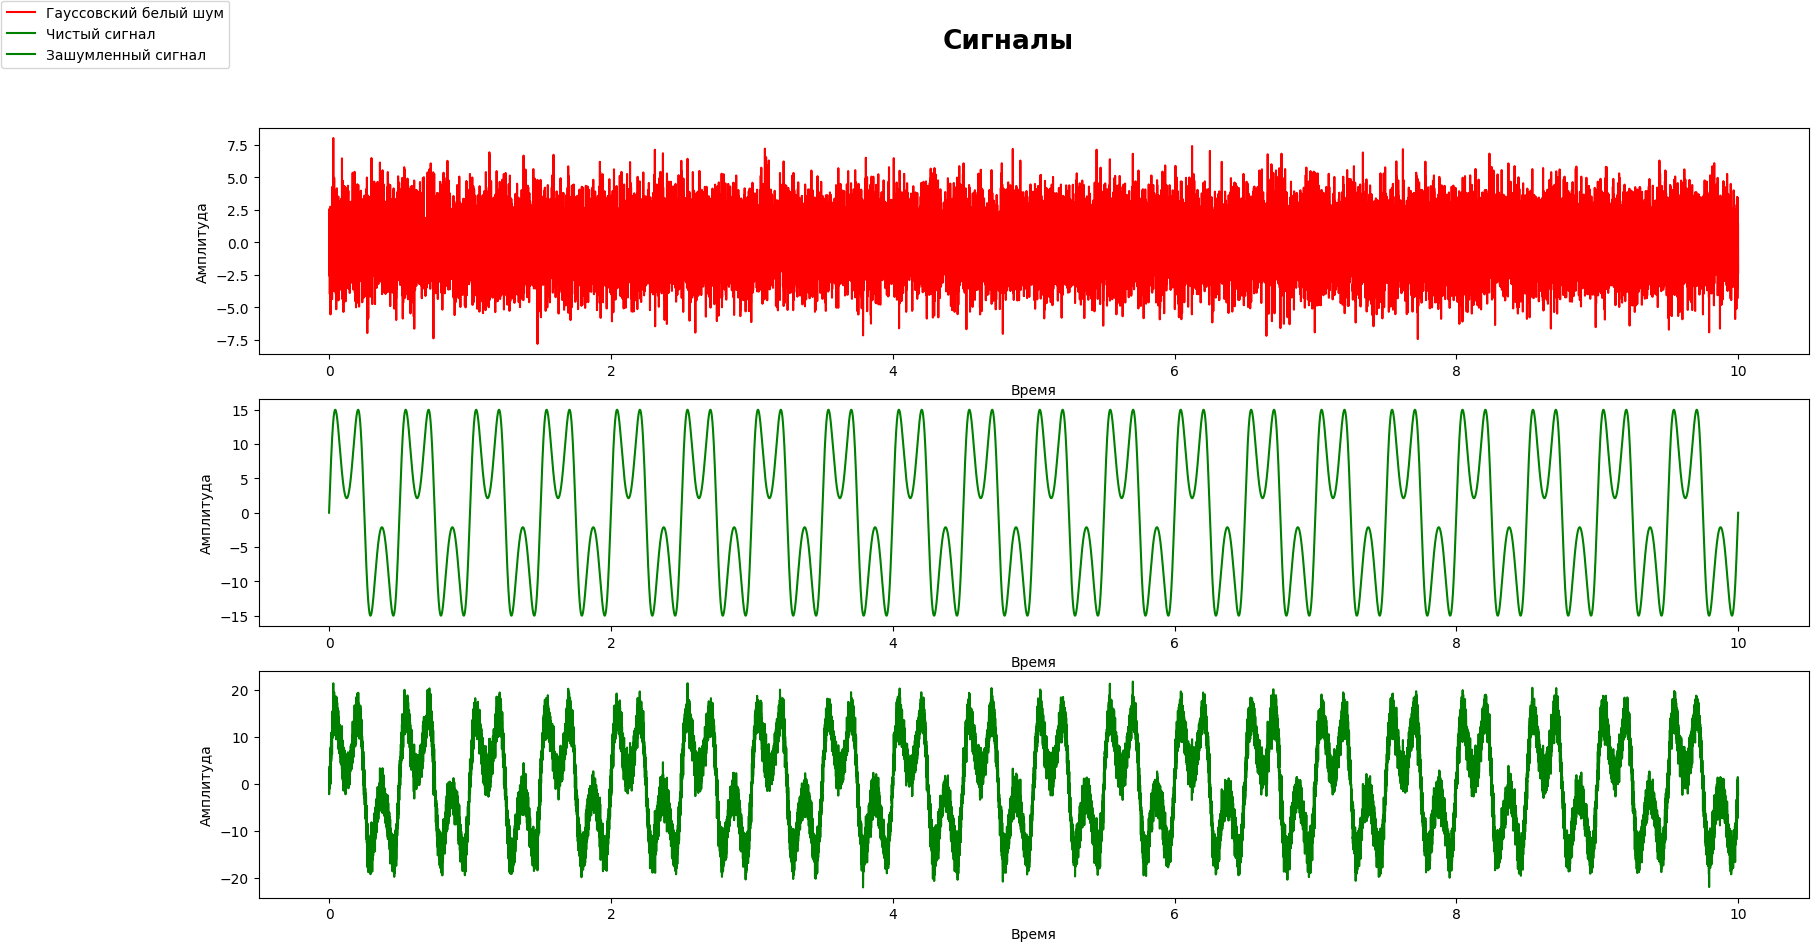

In [15]:
# Отрисовываем
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["Гауссовский белый шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)
